# Part II - Usage Pattern within Ford GoBike System
## by Xinyi Liao

## Investigation Overview

> In this investigation, I'm interested in what features are the best to identify common usage patterns. The main focus was about hours, days, and duration of the trips, member information such as member types, gender.

## Dataset Overview

> The data consists of information regarding the rides taken in February, 2019, within the Ford GoBike System of the greater San Francisco Bay area. The data originally contains 16 attributes, including details such as duration, start and end times, station locations, user type, and demographic information of the trips. The data was cleaned for better visualization and analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_trips = pd.read_csv('201902-fordgobike-tripdata_cleaned.csv')

# change data types
df_trips['start_time'] = pd.to_datetime(df_trips['start_time'])
df_trips['end_time'] = pd.to_datetime(df_trips['end_time'])

df_trips['user_type'] = df_trips['user_type'].astype('category')
df_trips['member_gender'] = df_trips['member_gender'].astype('category')

# set numeric variables and base color
numeric_vars = ['start_hr', 'end_hr', 'duration_hrs', 'member_age']
base_color = sb.color_palette('colorblind')[0]

# convert start/end day into ordered categorical types
ordinal_var_dict = {'start_day': ['Sunday', 'Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday'],
                    'end_day': ['Sunday', 'Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday']}
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_trips[var] = df_trips[var].astype(ordered_var)

In [3]:
# Create function to spot places where repeat code is.
def plot_labels(title, x_axis, y_axis):
    plt.title(title, fontsize=16)
    plt.xlabel(x_axis, fontsize=14)
    plt.ylabel(y_axis, fontsize=14)

## User Type Distribution
> In user base, subscribers accounted for 90.5%, and customers are 9.5%

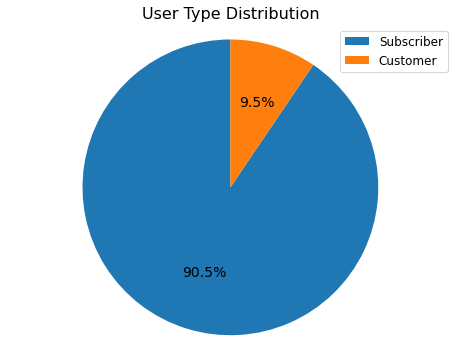

In [4]:
user_type_counts = df_trips['user_type'].value_counts()
labels = user_type_counts.index
sizes = user_type_counts.values

# Create the pie chart
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(sizes, autopct='%1.1f%%', startangle=90)

# Set font size for the percentage labels
for autotext in autotexts:
    autotext.set_fontsize(14)

# Set font size for the user type labels
for text in texts:
    text.set_fontsize(14)

# Create a legend
plt.legend(wedges, labels, loc='upper right', fontsize=12)

# Ensure the pie chart is a circle
plt.axis('equal')

plt.title('User Type Distribution', fontsize=16)
plt.show()

## Trip Counts by User Type in Hours and Days
> Subscribers had a lot more usage activities than Customers since Subscribers made up a significant portion of the user base. Most likely, Subscribers used the service for work commute purpose, obviously during typical rush hours at 8 a.m. or 5 p.m. In Subecriber user group, the service was used more heavily during weekdays. For Customers, they had a more stable trip counts at any time segiments.

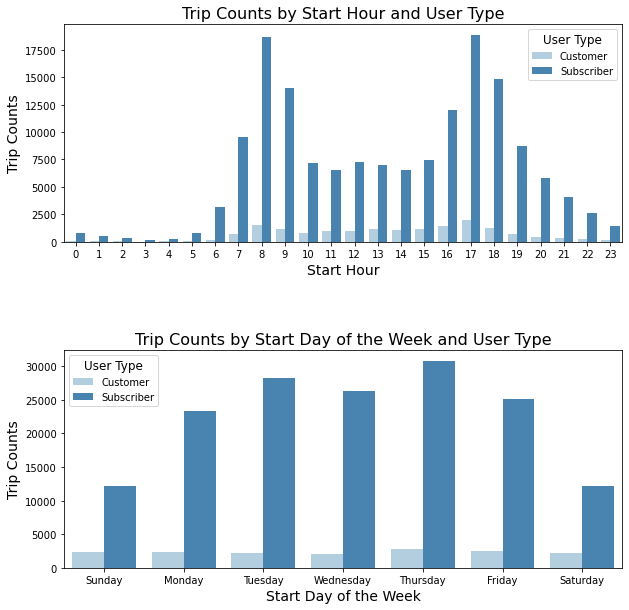

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Create a bar plot for start_hr in the first subplot
sb.countplot(data=df_trips, x='start_hr', hue='user_type', palette = 'Blues', ax=axes[0])
axes[0].set_ylabel('Trip Counts', fontsize=14)
axes[0].set_xlabel('Start Hour', fontsize=14)
axes[0].set_title('Trip Counts by Start Hour and User Type', fontsize=16)
axes[0].legend(title='User Type', title_fontsize=12, fontsize=10)

# Create a bar plot for end_hr in the second subplot
sb.countplot(data=df_trips, x='start_day', hue='user_type', palette = 'Blues', ax=axes[1])
axes[1].set_ylabel('Trip Counts', fontsize=14)
axes[1].set_xlabel('Start Day of the Week', fontsize=14)
axes[1].set_title('Trip Counts by Start Day of the Week and User Type', fontsize=16)
axes[1].legend(title='User Type', title_fontsize=12, fontsize=10)

plt.subplots_adjust(hspace=0.5)
plt.show()

## Trip Duration by User Type
> Customers tend to have longer distance trips than Subscriber.

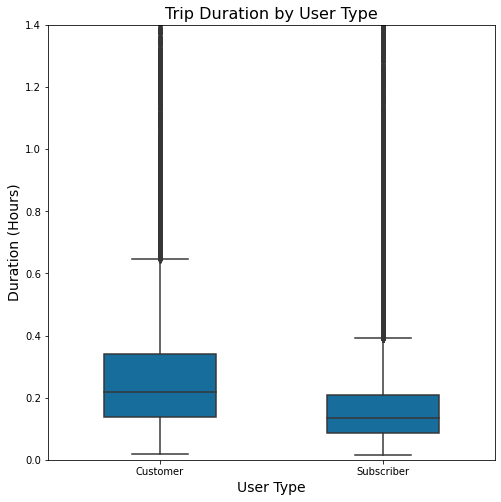

In [6]:
plt.figure(figsize=(8, 8))
sb.boxplot(data=df_trips, x='user_type', y='duration_hrs', color=base_color, width=0.5, linewidth=1.5)
plot_labels('Trip Duration by User Type', 'User Type','Duration (Hours)')
plt.ylim(0, 1.4)  # Set the limit for the time duration
plt.show()

## Average Trip Duration by Day and User Type

> On Saturdays and Sundays, both user categories experienced an increase in trip time, particularly customers. Subscriber usage was more efficient than Customers usage overall, with a fairly stable average durations from Monday to Friday.

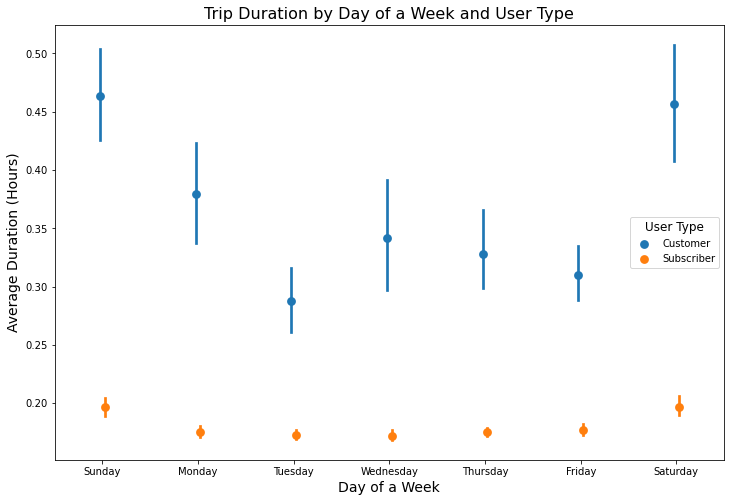

In [7]:
plt.figure(figsize=(12, 8))
sb.pointplot(data=df_trips, x='start_day', y='duration_hrs', hue='user_type', linestyles='', dodge=True)
plot_labels('Trip Duration by Day of a Week and User Type', 'Day of a Week', 'Average Duration (Hours)')
plt.legend(title='User Type', title_fontsize=12, fontsize=10)
plt.show()

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_fortgobike_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_fortgobike_slide_deck.ipynb to slides
[NbConvertApp] Writing 582503 bytes to Part_II_fortgobike_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_fortgobike_slide_deck.slides.html
Use Control-C to stop this server


> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 